In [1]:
#Installing tensorflow
!pip install tensorflow

In [2]:
#Importing needed libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive

#Connceting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Defining path to dataset -train, test and validation
train_dir = '/content/drive/MyDrive/FinalYearProject/ClassificationModels/Augmented_VIT_covers/train'
valid_dir = '/content/drive/MyDrive/FinalYearProject/ClassificationModels/Augmented_VIT_covers/val'
test_dir = '/content/drive/MyDrive/FinalYearProject/ClassificationModels/Augmented_VIT_covers/test'

In [6]:
from tensorflow.keras import regularizers
from tensorflow.keras import models, layers

#Building model
def build_cnn(num_classes):
    model = models.Sequential()

    #Initial conv layer with L2 regularization to help prevent overfitting
    model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2,2)))

    #Deeper conv layers to extract more complex features
    model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2,2)))

    #Flatten and pass through dense layers for classification
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  #Output layer

    return model

In [7]:
#Get the number of classes
num_classes = len(train_generator.class_indices)

#Building the model
model = build_cnn(num_classes)

#Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 452s 30s/step - accuracy: 0.1876 - loss: 2.2439 - val_accuracy: 0.3933 - val_loss: 1.8139
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.3860 - loss: 1.7016 - val_accuracy: 0.9791 - val_loss: 0.8089
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.7630 - loss: 0.9551 - val_accuracy: 0.9582 - val_loss: 0.4068
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.8988 - loss: 0.5271 - val_accuracy: 0.9791 - val_loss: 0.3210
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.8709 - loss: 0.5132 - val_accuracy: 1.0000 - val_loss: 0.2761
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9557 - loss: 0.3875 - val_accuracy: 1.0000 - val_loss: 0.2241
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.9412 - loss: 0.3612 - val_accuracy: 1.0000 - val_loss: 0.2101
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.9820 - loss: 0.2739 - val_accuracy: 1.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 1.0000 - loss: 0.1617
Test Accuracy: 100.00%
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step

Classification Report:

              precision    recall  f1-score   support

   Midnights       1.00      1.00      1.00        56
     Rumours       1.00      1.00      1.00        47
       Taste       1.00      1.00      1.00        41
     Whitney       1.00      1.00      1.00        50
      Wicked       1.00      1.00      1.00        44

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238



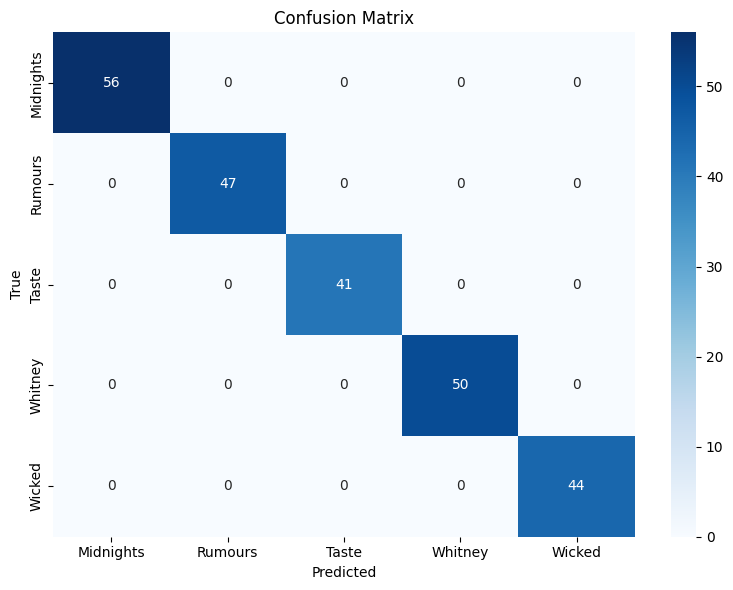

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Evaluate basic metrics
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

#Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

#Get true labels
y_true = test_generator.classes

#Get class names
class_names = list(test_generator.class_indices.keys())

#Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

#Confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
